In [1]:
import numpy as np
import pandas as pd
import requests
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df.shape

(256442, 6)

In [3]:
df=df.loc[0:1000,:]

In [4]:
df.shape

(1001, 6)

In [5]:
df.head()

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated


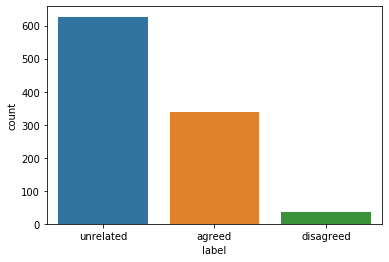

In [6]:
import seaborn as sns
sns.countplot(df.label)

In [7]:
count_class_unrelated,count_class_agreed,count_class_disagreed = df.label.value_counts()

In [8]:
#df_class_unrelated = df[df['label'] == 'unrelated']
#df_class_agreed = df[df['label'] == 'agreed']
#df_class_disagreed = df[df['label'] == 'disagreed']

In [9]:
#df_class_agreed_under = df_class_agreed.sample(count_class_disagreed)
#df_class_unrelated_under = df_class_unrelated.sample(count_class_disagreed)
#df = pd.concat([df_class_unrelated_under,df_class_agreed_under,df_class_disagreed], axis=0)

In [10]:
#print('Random under-sampling:')
#print(df.label.value_counts())
#df.label.value_counts().plot(kind='bar',title = 'count(Class)')

In [11]:
#df=df.reset_index()

In [12]:
X=df.drop('label',axis=1)

In [13]:
X.head()

,id,tid1,tid2,title1_en,title2_en
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per..."
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...


In [14]:
y=df['label']

In [15]:
y.head(10)

0    unrelated
1    unrelated
2    unrelated
3    unrelated
4    unrelated
5       agreed
6       agreed
7       agreed
8    unrelated
9       agreed
Name: label, dtype: object

In [16]:
df.shape

(1001, 6)

In [17]:
df.isna().sum()

id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
dtype: int64

In [18]:
messages=df.copy()

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title2_en'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus[3]

'shenzhen gdp overtak hong kong bureau statist refut rumor unsurpass gap shrink'

In [21]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [22]:
X.shape

(1001, 5000)

In [23]:
y=messages['label']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [25]:
from collections import Counter
Counter(y_train)

Counter({'unrelated': 426, 'agreed': 222, 'disagreed': 22})

In [27]:
Counter(y_train_smote)

NameError: name 'y_train_smote' is not defined

In [28]:
sns.countplot(y_train_smote)

NameError: name 'y_train_smote' is not defined

In [29]:
tfidf_v.get_feature_names()[:20]

['abdomin',
 'abnorm',
 'abnorm listen',
 'abnorm listen advic',
 'absolut',
 'absolut good',
 'absolut good news',
 'accept',
 'accid',
 'accur',
 'acr',
 'across',
 'across million',
 'across million kilomet',
 'actual',
 'add',
 'add noodl',
 'add noodl give',
 'add two',
 'add two thing']

In [30]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [31]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [32]:
count_df.head()

,abdomin,abnorm,abnorm listen,abnorm listen advic,absolut,absolut good,absolut good news,accept,accid,accur,...,zhang yingx,zhangbaiji,zhen,zhen insult,zhen insult super,zhiqian,zhiqian attack,zhiqian attack wang,zhoucun,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
import matplotlib.pyplot as plt


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [36]:
from sklearn import metrics
import numpy as np
import itertools

In [38]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.792


In [39]:
y_test.shape

(331,)

[[  0   0  13]
 [  0  78  39]
 [  0  17 184]]
Confusion matrix, without normalization


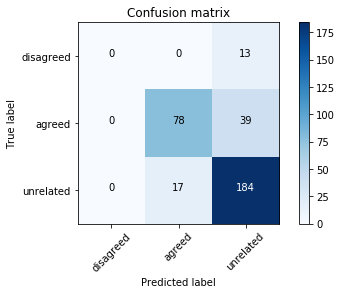

In [40]:
cm = confusion_matrix(y_test, pred, labels=['disagreed', 'agreed','unrelated'])
print(cm)
plot_confusion_matrix(cm, classes=['disagreed', 'agreed','unrelated'])

In [41]:

precision=precision_score(y_test,pred,average='micro')
precision

0.7915407854984894

In [42]:
Recall=recall_score(y_test,pred,average='micro')
Recall

0.7915407854984894

In [43]:
y_train.shape

(670,)

In [44]:
y_test

708       agreed
533    unrelated
298       agreed
356    disagreed
833       agreed
         ...    
48     unrelated
358    unrelated
263    unrelated
809       agreed
700    unrelated
Name: label, Length: 331, dtype: object

In [45]:
pred

array(['agreed', 'unrelated', 'agreed', 'unrelated', 'agreed',
       'unrelated', 'unrelated', 'agreed', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'unrelated', 'agreed', 'unrelated',
       'unrelated', 'unrelated', 'agreed', 'unrelated', 'agreed',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated',
       'unrelated', 'agreed', 'unrelated', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated',
       'agreed', 'unrelated', 'unrelated', 'agreed', 'unrelated',
       'unrelated', 'agreed', 'unrelated', 'unrelated', 'unrelated',
       'unrelated', 'agreed', 'unrelated', 'unrelated', 'agreed',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated',
       'unrelated', 'agreed', 'agreed', 'agreed', 'unrelated', 'agreed',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'agreed',
       'agreed', 'unrelated', 'un

## TFIDF

In [46]:
df

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated
...,...,...,...,...,...,...
996,86266,604,612,"Ten years of cervical spondylosis, was actuall...","""Honeydew"" was originally intended for him, an...",unrelated
997,208830,604,613,"Ten years of cervical spondylosis, was actuall...","""Honeydew"" was originally intended for Zhang Y...",unrelated
998,93644,604,614,"Ten years of cervical spondylosis, was actuall...","""Fragrant Honeydew"" Yang Zhengcheng loves her ...",unrelated
999,112069,604,615,"Ten years of cervical spondylosis, was actuall...",Denglun is not a man who is supposed to be a m...,unrelated


In [47]:
y

0       unrelated
1       unrelated
2       unrelated
3       unrelated
4       unrelated
          ...    
996     unrelated
997     unrelated
998     unrelated
999     unrelated
1000    unrelated
Name: label, Length: 1001, dtype: object

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df['title2_en'], y, test_size=0.33,random_state=53)

In [49]:
#X_train_smote,y_train_smote=smote.fit_sample(X_train,y_train)

In [50]:
y_test

722    unrelated
555       agreed
688    unrelated
915    unrelated
95     unrelated
         ...    
858    unrelated
903    unrelated
444    unrelated
900    unrelated
918    unrelated
Name: label, Length: 331, dtype: object

In [51]:
X_train

677    the beijing deputy central planning program ha...
658    Beijing's three-year social security can be bo...
690    City of urban planning commission discloses ru...
758    My God! She was scolded by her! The fans came ...
495    There was a fraud in the white city of more th...
                             ...                        
763    He was always scolded, stayed up three days to...
421    Rumors about paying 100 yuan to pay 100 yuan a...
885    How much is 1 million dollars in ten years? Yo...
797    Wang Jun-kai's interpretation of light-hearted...
537    Rumors of adjustment of photovoltaic charges a...
Name: title2_en, Length: 670, dtype: object

In [52]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [53]:
count_test

<331x1882 sparse matrix of type '<class 'numpy.int64'>'
	with 2415 stored elements in Compressed Sparse Row format>

In [54]:
#tfidf
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)


print(tfidf_test)

  (0, 1785)	0.5506002867374541
  (0, 1716)	0.5412264515787067
  (0, 969)	0.63554169993491
  (1, 1847)	0.18721358938691862
  (1, 1787)	0.2951728720845948
  (1, 1378)	0.4302775535189193
  (1, 1271)	0.38651842559380045
  (1, 1149)	0.3427592976686816
  (1, 888)	0.40468010461846476
  (1, 636)	0.3511892782785074
  (1, 25)	0.3724311329069345
  (2, 1880)	0.33882438965127304
  (2, 1847)	0.17032016003425168
  (2, 1607)	0.29353983556820945
  (2, 1510)	0.33882438965127304
  (2, 1048)	0.33882438965127304
  (2, 377)	0.33882438965127304
  (2, 373)	0.33882438965127304
  (2, 367)	0.25640120982426545
  (2, 346)	0.3118300259256539
  (2, 255)	0.23403254516277924
  (2, 149)	0.3050652311296681
  (3, 1832)	0.2975208698719925
  (3, 1542)	0.3087746647457552
  (3, 1428)	0.245594091568263
  :	:
  (327, 252)	0.40935544195190565
  (328, 1415)	0.32842116646054403
  (328, 1412)	0.2215870160122094
  (328, 1370)	0.43796708206198315
  (328, 767)	0.43796708206198315
  (328, 566)	0.43796708206198315
  (328, 296)	0.312924

accuracy:   0.749
[[  1   0   9]
 [  0  89  29]
 [  8  37 158]]
Confusion matrix, without normalization


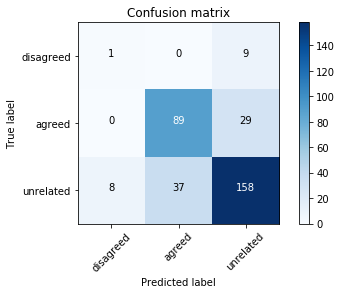

In [55]:


clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['disagreed', 'agreed','unrelated'])
print(cm)
plot_confusion_matrix(cm, classes=['disagreed', 'agreed','unrelated'])

In [56]:
pred

array(['unrelated', 'unrelated', 'unrelated', 'unrelated', 'agreed',
       'unrelated', 'unrelated', 'agreed', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'disagreed', 'unrelated', 'agreed',
       'unrelated', 'unrelated', 'agreed', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated',
       'disagreed', 'agreed', 'unrelated', 'unrelated', 'unrelated',
       'agreed', 'agreed', 'unrelated', 'unrelated', 'unrelated',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'agreed',
       'unrelated', 'unrelated', 'unrelated', 'unrelated', 'agreed',
       'agreed', 'agreed', 'unrelated', 'unrelated', 'agreed',
       'unrelated', 'unrelated', 'agreed', 'unrelated', 'agreed',
       'agreed', 'unrelated', 'agreed', 'agreed', 'unrelated',
       'unrelated', 'unrelated', 'unrelated', 'agreed', 'agreed',
       'unrelated', 'unrelated', 'unrelated', 'agreed', 'unrelated',
       'unrelated', 'agreed', 'agreed', 'unrelated',

[[  0   0  10]
 [  0  80  38]
 [  0  24 179]]
Confusion matrix, without normalization


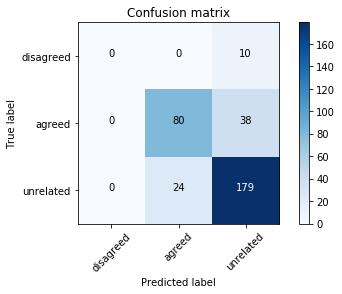

In [57]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
score
cm = confusion_matrix(y_test, pred, labels=['disagreed', 'agreed','unrelated'])
print(cm)
plot_confusion_matrix(cm, classes=['disagreed', 'agreed','unrelated'])

# kjam

In [58]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [59]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [60]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


Training models
Now I have my vectors and I can create my different classifiers. In my post I noted that there is definitely noise in the dataset, so we should expect to see that reflected in our features. Normally, I would spend some time cleaning the data, but this was a small proof of concept and investigation. I hoped merely that at least one model would be able to correct for the noise.

I will compare the following models (and training data):

multinomialNB with counts (sgd_count_clf)

multinomialNB with tf-idf (mn_tfidf_clf)

passive aggressive with tf-idf (pa_tfidf_clf)

linear svc with tf-idf (svc_tfidf_clf)

linear sgd with tf-idf (sgd_tfidf_clf)

For speed and clarity, I am primarily not doing parameter tuning, although this could be added as a step (perhaps in a scikit-learn Pipeline).

In [61]:
mn_count_clf = MultinomialNB(alpha=0.1)

In [62]:
mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.746


In [63]:
mn_tfidf_clf = MultinomialNB(alpha=0.1)

In [64]:
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.752


In [65]:
pa_tfidf_clf = PassiveAggressiveClassifier(max_iter=50)


In [66]:

pa_tfidf_clf.fit(tfidf_train, y_train)
pred = pa_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.752


In [67]:
svc_tfidf_clf = LinearSVC()


In [68]:

svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.767


In [69]:
sgd_tfidf_clf = SGDClassifier()


In [70]:
sgd_tfidf_clf.fit(tfidf_train, y_train)
pred = sgd_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.764


In [71]:
sgd_tfidf_clf.decision_function?


In [72]:
mn_count_clf.predict_proba?


## Using TensorFlow

In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [252]:
df.head()

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated


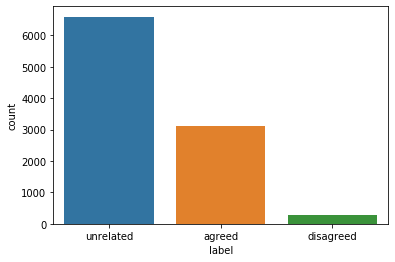

In [253]:
sns.countplot(df.label)

In [254]:
df.isna().sum()

id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
dtype: int64

In [255]:
df['text'] = df['title1_en'] + " " + df['title2_en']

In [256]:
df.head()

,id,tid1,tid2,title1_en,title2_en,label,text
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated,There are two new old-age insurance benefits f...
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated,"""If you do not come to Shenzhen, sooner or lat..."
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated,"""If you do not come to Shenzhen, sooner or lat..."
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated,"""If you do not come to Shenzhen, sooner or lat..."
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated,"""If you do not come to Shenzhen, sooner or lat..."


In [257]:
del df['title1_en']

In [258]:
del df['title2_en']

In [279]:
labels = df['label'].astype('category').cat.categories.tolist()
replace_map_comp = {'label' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
print(replace_map_comp)

{'label': {'agreed': 0, 'disagreed': 1, 'unrelated': 2}}


In [280]:
df.replace(replace_map_comp, inplace=True)

In [281]:
df.head()

,id,tid1,tid2,label,text
0,195611,0,1,2,There are two new old-age insurance benefits f...
1,191474,2,3,2,"""If you do not come to Shenzhen, sooner or lat..."
2,25300,2,4,2,"""If you do not come to Shenzhen, sooner or lat..."
3,123757,2,8,2,"""If you do not come to Shenzhen, sooner or lat..."
4,141761,2,11,2,"""If you do not come to Shenzhen, sooner or lat..."


In [282]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [283]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


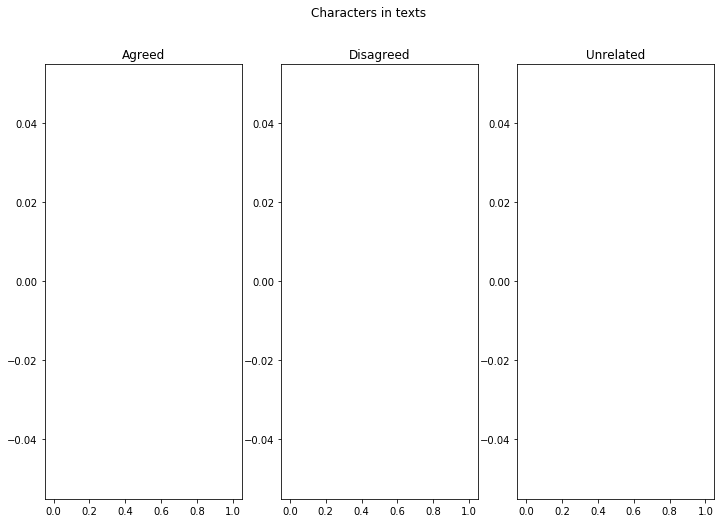

In [284]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,8))
text_len=df[df['label']=='agreed']['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Agreed')
text_len=df[df['label']=='disagreed']['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Disagreed')
text_len=df[df['label']=='unrelated']['text'].str.len()
ax3.hist(text_len,color='yellow')
ax3.set_title('Unrelated')
fig.suptitle('Characters in texts')
plt.show()

In [285]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

['There', 'are', 'two', 'new', 'old-age']

In [286]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'the': 17709,
 'to': 9738,
 'of': 9585,
 'a': 6148,
 'in': 5793,
 'and': 4999,
 'is': 4622,
 'be': 3480,
 'The': 3194,
 'will': 3037}

In [287]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

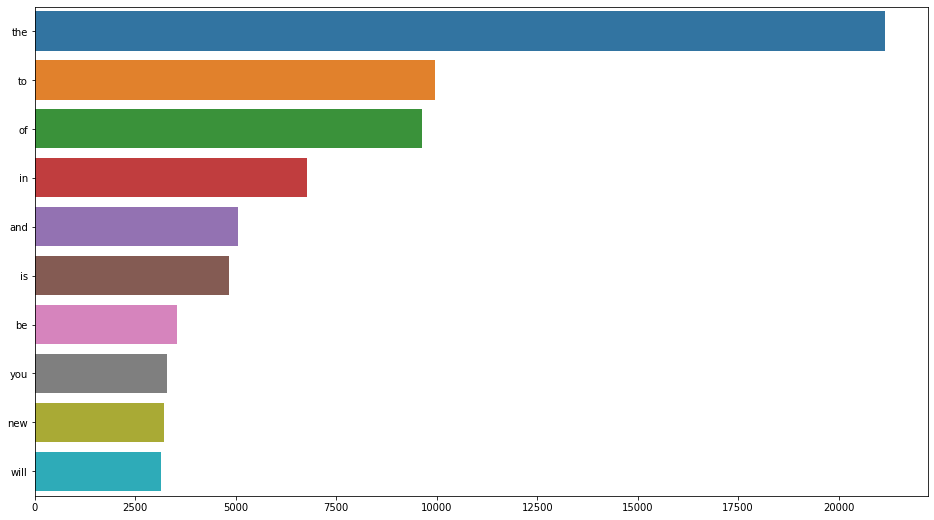

In [288]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [289]:
#bigram

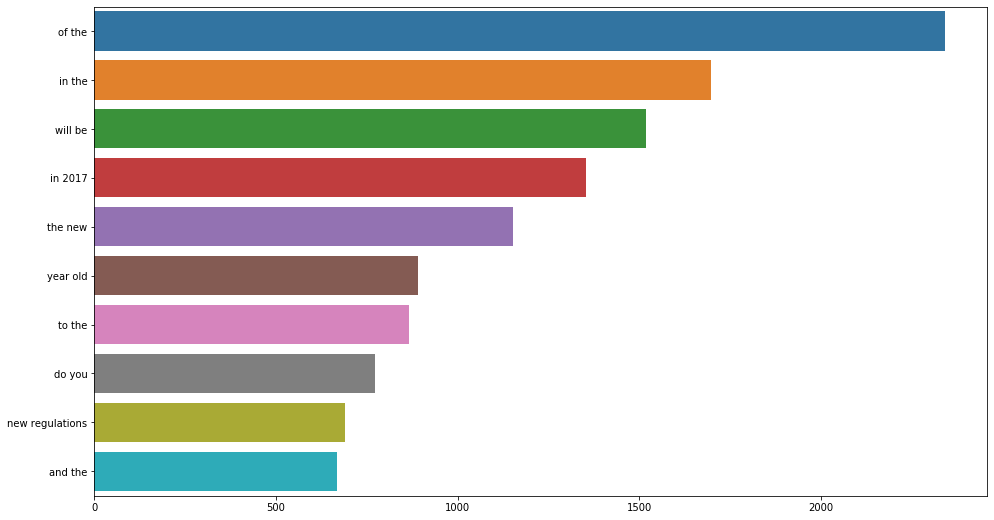

In [290]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

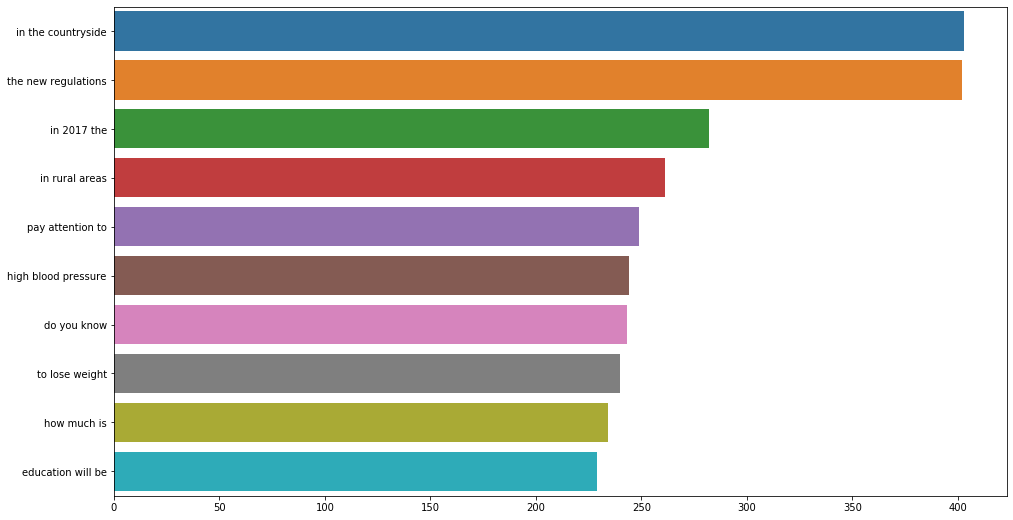

In [291]:
#trigram
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [292]:
df.shape

(10001, 5)

In [293]:
X_train,X_test,y_train,y_test = train_test_split(df.text,df.label,test_size=0.2,random_state = 0)

In [294]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [295]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [296]:
# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [297]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [298]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         49664     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
________________________________________________

In [299]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [303]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Train on 7200 samples, validate on 800 samples
Epoch 1/10
4020/7200 [===============>..............] - ETA: 18s - loss: -8.4390 - accuracy: 0.0266WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


KeyboardInterrupt: 

In [101]:
##

In [106]:
max_features = 4500
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [107]:
# Tokenizing the text - converting the words, letters into counts or numbers. 
# We dont need to explicitly remove the punctuations. we have an inbuilt option in Tokenizer for this purpose
tokenizer = Tokenizer(num_words = max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = df['text'])
X = tokenizer.texts_to_sequences(texts = df['text'])

In [108]:
X = pad_sequences(sequences = X, maxlen = max_features, padding = 'pre')

(256442, 4500)
(256442,)


In [120]:
labels = df['label'].astype('category').cat.categories.tolist()
replace_map_comp = {'label' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)


{'label': {'agreed': 1, 'disagreed': 2, 'unrelated': 3}}


In [121]:
df.replace(replace_map_comp, inplace=True)


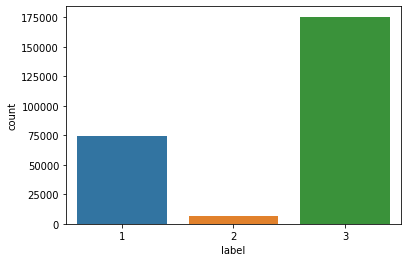

In [127]:
sns.countplot(df.label)

In [129]:
print(X.shape)
y = df['label'].values
print(y.shape)

(256442, 4500)
(256442,)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)


In [131]:
# LSTM Neural Network
lstm_model = Sequential(name = 'lstm_nn_model')
lstm_model.add(layer = Embedding(input_dim = max_features, output_dim = 120, name = '1st_layer'))
lstm_model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
lstm_model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm_model.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))
# compiling the model
lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [132]:
lstm_model_fit = lstm_model.fit(X_train, y_train, epochs = 1)


C:\Users\Dell\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1


InvalidArgumentError:  Received a label value of 3 which is outside the valid range of [0, 3).  Label values: 2 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3
	 [[node loss_16/output_layer_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at C:\Users\Dell\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_97353]

Function call stack:
keras_scratch_graph
